Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, hamming_loss

Membaca Data

In [2]:
df = pd.read_csv('lottery_hk.csv')

Memisahkan Kolom untuk Fitur dan Target

In [3]:
feature_columns = [f'b{i}_count' for i in range(1, 50)] + ['year', 'month', 'day_of_week', 'day_of_year']
target_columns = [f'num_{i}' for i in range(1, 50)]

X = df[feature_columns]
y = df[target_columns]

Membagi Dataset (80:20)

In [4]:
train_split_point = int(len(df) * 0.80)

X_train = X[:train_split_point]
y_train = y[:train_split_point]

X_test = X[train_split_point:]
y_test = y[train_split_point:]

print(f'data train: {X_train.shape[0]}')
print(f'data test: {X_test.shape[0]}')

data train: 1128
data test: 283


Melatih Model Random Forest

In [6]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) 
multi_label_model = MultiOutputClassifier(base_model)
multi_label_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42))

Evaluasi Model Random Forest Menggunakan Hamming Loss dan F1 Score

In [ ]:
y_pred_test = multi_label_model.predict(X_test)
y_pred_test_proba = multi_label_model.predict_proba(X_test)

f1_samples = f1_score(y_test, y_pred_test, average='samples')
hamming = hamming_loss(y_test, y_pred_test)

In [15]:
print(f"F1 Score: {f1_samples:.4f}")
print(f"Hamming Loss: {hamming:.4f}")

F1 Score: 0.1482
Hamming Loss: 0.2447


Melatih Dataset dengan Menggunakan Model XGBoost

In [18]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                            n_estimators=100, 
                            random_state=42,
                            n_jobs=-1,
                            tree_method='hist')

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

Evaluasi Model XGBoost Menggunakan Hamming Loss dan F1 Score

In [21]:
hamming = hamming_loss(y_test, y_pred_test)
error_percentage = hamming * 100
print(f"  Hamming Loss: {hamming:.4f}")

f1_samples = f1_score(y_test, y_pred_test, average='samples', zero_division=0)
print(f"  F1 Score: {f1_samples:.4f}")

  Hamming Loss: 0.2447
  F1 Score: 0.1482


XGB Features Important

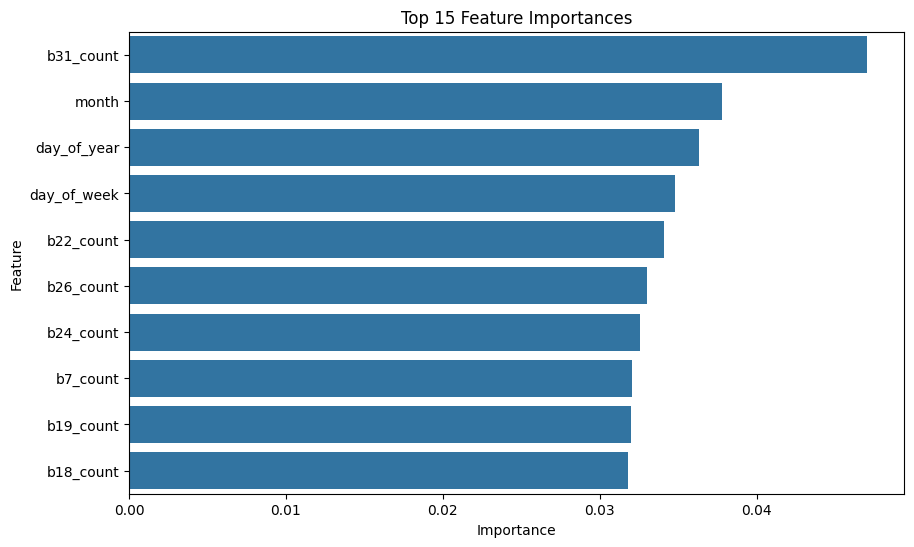

In [16]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 15 Feature Importances')
plt.show()

In [13]:
importance_df.head(5)

,Feature,Importance
30,b31_count,0.047048
50,month,0.037800
52,day_of_year,0.036320
51,day_of_week,0.034773
21,b22_count,0.034092
